Total SD: 62071
Total PD: 10530


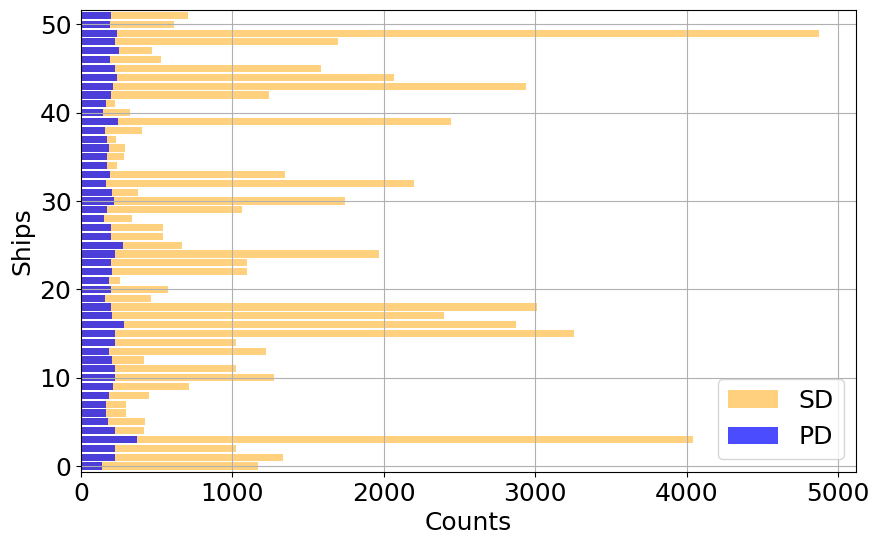

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 전체 글꼴 크기 설정
plt.rcParams.update({'font.size': 18})

# CSV 파일 읽기
df = pd.read_csv('raw_data.csv')

# ships_idx 별 전체 갯수 계산
total_counts = df['ships_idx'].value_counts().sort_index()

# ships_idx 별 MDM=True 인 갯수 계산
mdm_true_counts = df[df['MDM'] == True]['ships_idx'].value_counts().sort_index()

# 데이터프레임으로 합치기
summary_df = pd.DataFrame({
    'SD': total_counts,
    'PD': mdm_true_counts
}).fillna(0)  # NaN 값을 0으로 대체

# SD와 PD의 총 갯수 계산
total_SD = summary_df['SD'].sum()
total_PD = summary_df['PD'].sum()

# 총 갯수 출력
print(f"Total SD: {total_SD}")
print(f"Total PD: {total_PD}")

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))

# Total Counts 먼저 그리기 (굵은 막대로 설정)
summary_df['SD'].plot(kind='barh', ax=ax, color='orange', alpha=0.5, label='SD', width=0.8)  # 막대 폭을 넓게 설정

# MDM=True Counts를 그 위에 겹쳐서 그리기 (굵은 막대로 설정)
summary_df['PD'].plot(kind='barh', ax=ax, color='blue', alpha=0.7, label='PD', width=0.8)  # 막대 폭을 넓게 설정

# y축 라벨을 10 단위로 설정
y_labels = ax.get_yticks()
ax.set_yticks(np.arange(min(y_labels), max(y_labels) + 1, 10))
ax.set_yticklabels([int(label) for label in np.arange(min(y_labels), max(y_labels) + 1, 10)])

# 그리드 추가
ax.grid(True)

# 범례와 제목 설정
plt.legend(prop={'size': 18})  # 레전드 글꼴 크기 설정
plt.xlabel('Counts')
plt.ylabel('Ships')

# 그래프 출력
plt.show()


Tag Description의 평균 글자수: 27.38


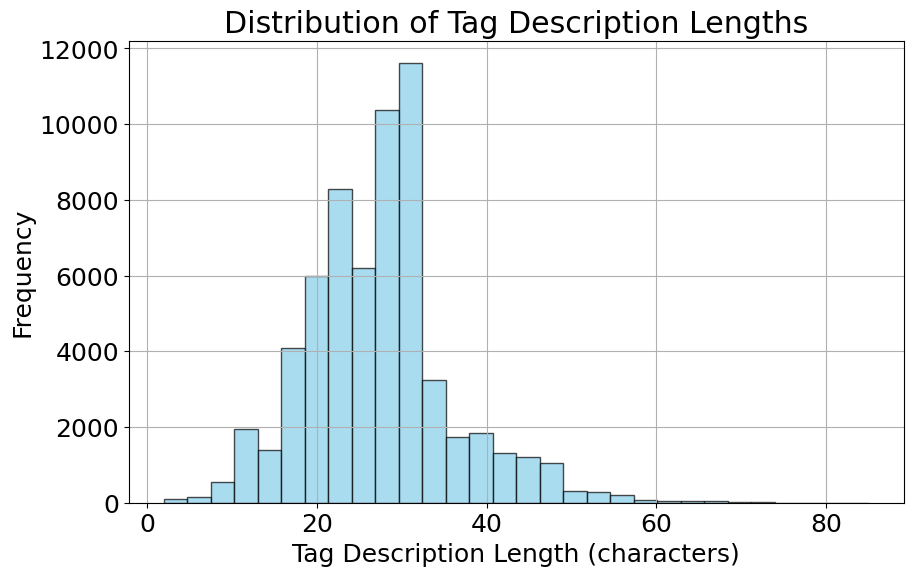

Tag Description의 평균 토큰 수: 5.29


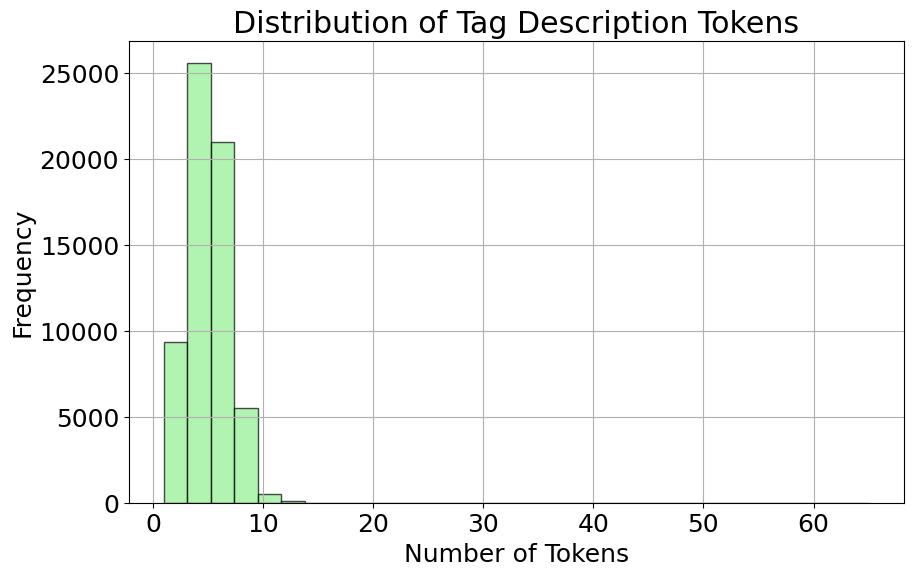

전체 토큰 수: 328251
고유 토큰 수: 8283


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# SD와 PD의 총 갯수 계산
total_SD = summary_df['SD'].sum()  # SD의 총 갯수
total_PD = summary_df['PD'].sum()  # PD의 총 갯수

# tag_description의 글자수 계산
df['tag_description_length'] = df['tag_description'].astype(str).apply(len)

# tag_description의 평균 글자수 계산
mean_tag_description_length = df['tag_description_length'].mean()

# 결과 출력
print(f"Tag Description의 평균 글자수: {mean_tag_description_length:.2f}")

# 글자수 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(df['tag_description_length'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Tag Description Lengths')
plt.xlabel('Tag Description Length (characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# tag_description을 ' '로 split한 후 토큰 수 계산
df['tag_description_tokens'] = df['tag_description'].astype(str).apply(lambda x: len(x.split(' ')))

# tag_description의 평균 토큰 수 계산
mean_tag_description_tokens = df['tag_description_tokens'].mean()

# 결과 출력
print(f"Tag Description의 평균 토큰 수: {mean_tag_description_tokens:.2f}")

# 토큰 수 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(df['tag_description_tokens'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of Tag Description Tokens')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 전체 텍스트에서 모든 토큰 수와 고유 토큰 수 계산
all_tokens = df['tag_description'].astype(str).apply(lambda x: x.split(' ')).sum()  # 전체 토큰 리스트
unique_tokens = set(all_tokens)  # 고유 토큰 집합

# 전체 토큰 수와 고유 토큰 수 계산
total_token_count = len(all_tokens)
unique_token_count = len(unique_tokens)

# 결과 출력
print(f"전체 토큰 수: {total_token_count}")
print(f"고유 토큰 수: {unique_token_count}")
